## Exploratory Data Analysis (EDA) + Feature Engineering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 50)
pd.set_option('display.float', '{:.4f}'.format)

In [2]:
data = pd.read_csv('data/Telco-Customer-Churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.8500,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.9500,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.8500,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.3000,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.7000,151.65,Yes


# 1. Exploratory Data Analysis (EDA)

In [3]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.0000,7043.0000,7043.0000
mean,0.1621,32.3711,64.7617
std,0.3686,24.5595,30.0900
min,0.0000,0.0000,18.2500
25%,0.0000,9.0000,35.5000
50%,0.0000,29.0000,70.3500
75%,0.0000,55.0000,89.8500
max,1.0000,72.0000,118.7500


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## `customerID`

In [6]:
data.customerID.nunique()

7043

The `customerID` is unique for each customers and will not be useful to our model.

## `Churn`: Target variable

In [28]:
data.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

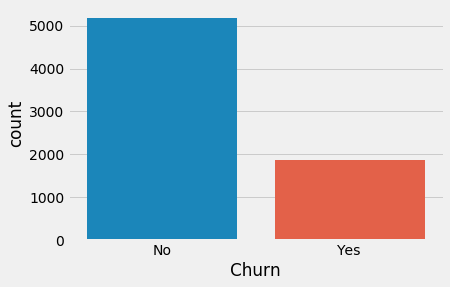

In [29]:
sns.countplot('Churn', data=data)

## `gender`, `SeniorCitizen`, `Partner`, `Dependents`, `PhoneService`, `PaperlessBilling`
- `gender`: Whether the customer is a male or a female
- `SeniorCitizen`: Whether the customer is a senior citizen or not (1, 0)
- `Partner`: Whether the customer has a partner or not (Yes, No)
- `Dependents`: Whether the customer has dependents or not (Yes, No)
- `PhoneService`: Whether the customer has a ohone service or not (Yes, No)
- `PaperlessBilling`: Whether the customer has paperless billing or not (Yes, No)

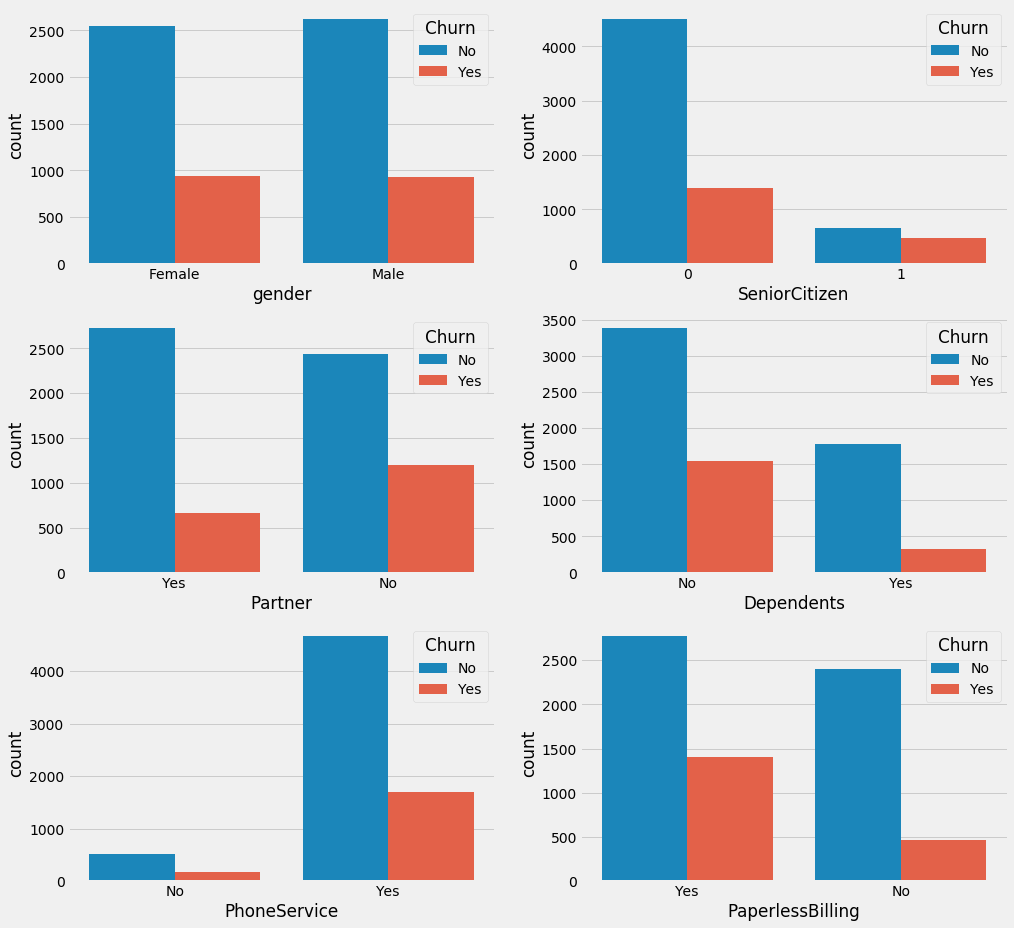

In [104]:
plt.figure(figsize=(15, 15))

plt.subplot(3, 2, 1)
sns.countplot('gender', data=data, hue='Churn')

plt.subplot(3, 2, 2)
sns.countplot('SeniorCitizen', data=data, hue='Churn')

plt.subplot(3, 2, 3)
sns.countplot('Partner', data=data, hue='Churn')

plt.subplot(3, 2, 4)
sns.countplot('Dependents', data=data, hue='Churn')

plt.subplot(3, 2, 5)
sns.countplot('PhoneService', data=data, hue='Churn')

plt.subplot(3, 2, 6)
sns.countplot('PaperlessBilling', data=data, hue='Churn')

It seems that the gender column doesn't have a big effect on the Chur rate. 
- Churn: 50.73% Males, 49.26% Females
- Not Churn: 50.24% Males, 49.75% Females

The senior citizen are more likely to churn

## `tenure`, `MonthlyCharges`, `TotalCharges`
- `tenure`: The number of months the customer has stayed with the company
- `MonthlyCharges`: The amount charged to the customer monthly
- `TotalCharges`: The total amount charged to the customer

In [37]:
data.tenure.value_counts()

1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64

In [57]:
data.tenure.max()

72

In [127]:
data['TotalCharges'] = data.TotalCharges.replace(' ', np.nan)
data['TotalCharges'] = data.TotalCharges.astype(float)

In [128]:
data.TotalCharges.dtype

dtype('float64')

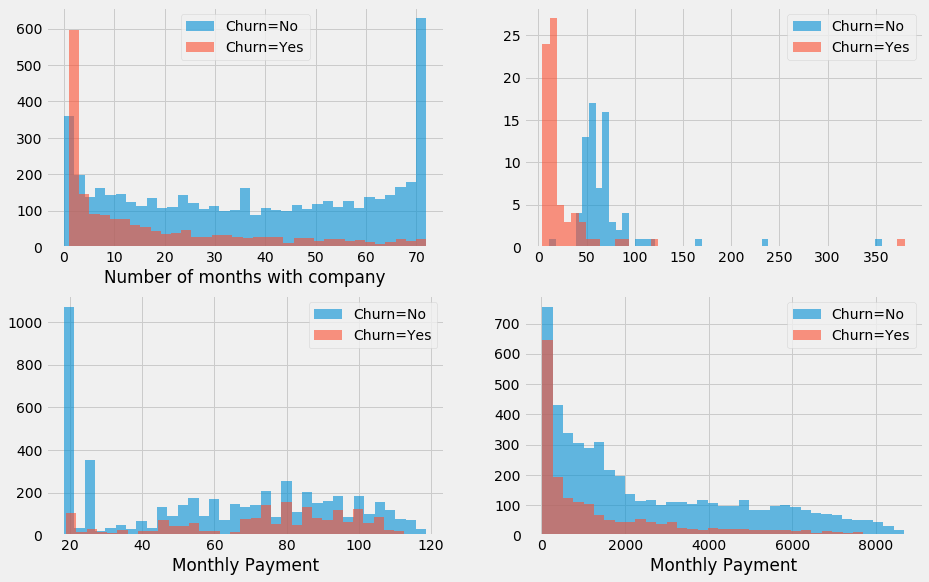

In [129]:
plt.figure(figsize=(14, 14))

plt.subplot(3, 2, 1)
data[data.Churn == 'No'].tenure.hist(bins=35, alpha=0.6, label='Churn=No')
data[data.Churn == 'Yes'].tenure.hist(bins=35, alpha=0.6, label='Churn=Yes')
plt.legend()
plt.xlabel('Number of months with company')

plt.subplot(3, 2, 2)
data[data.Churn == 'No'].tenure.value_counts().hist(bins=50, alpha=0.6, label='Churn=No')
data[data.Churn == 'Yes'].tenure.value_counts().hist(bins=50, alpha=0.6, label='Churn=Yes')
plt.legend()

plt.subplot(3, 2, 3)
data[data.Churn == 'No'].MonthlyCharges.hist(bins=35, alpha=0.6, label='Churn=No')
data[data.Churn == 'Yes'].MonthlyCharges.hist(bins=35, alpha=0.6, label='Churn=Yes')
plt.xlabel('Monthly Payment')
plt.legend()

plt.subplot(3, 2, 4)
data[data.Churn == 'No'].TotalCharges.hist(bins=35, alpha=0.6, label='Churn=No')
data[data.Churn == 'Yes'].TotalCharges.hist(bins=35, alpha=0.6, label='Churn=Yes')
plt.xlabel('Monthly Payment')
plt.legend()

## `OnlineSecurity`, `OnlineBackup`, `InternetService`, `MultipleLines`, `DeviceProtection`, `TechSupport`

- `OnlineSecurity`: Whether the customer has online security or not (Yes, No, No internet service)
- `OnlineBackup`: Whether the customer has online backup or not (Yes, No, No internet service)
- `InternetService`: Customer's internet service provider (DSL, Fiber optic, No)
- `MultipleLines`: Whether the customer has Multiple Lines or not (Yes, No, No phone service)
- `DeviceProtection`: Whether the customer has device protection or not (Yes, No, No internet service)
- `TechSupport`: Whether the customer has tech support or not (Yes, No, No internet service)
- `Contract`: The contract term of the customer (Month-to-month, One year, Two year)

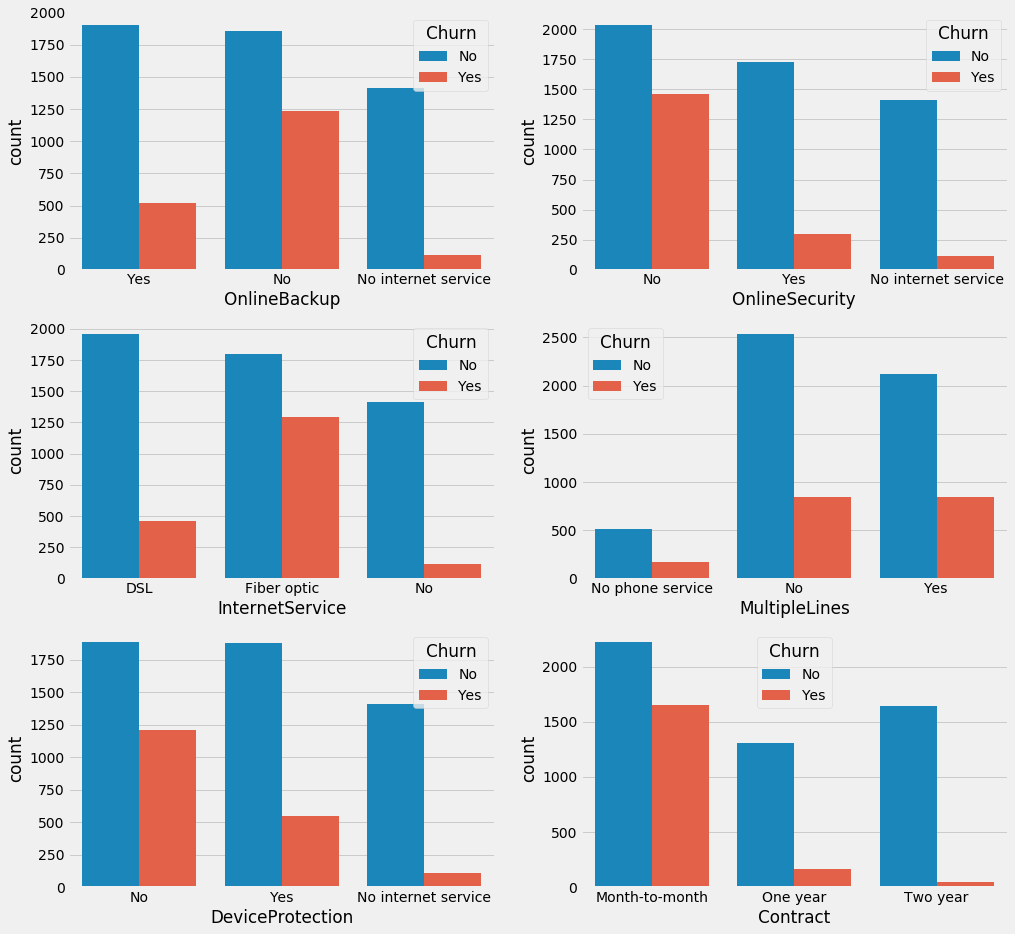

In [101]:
plt.figure(figsize=(15, 15))

plt.subplot(3, 2, 1)
sns.countplot('OnlineBackup', data=data, hue='Churn')

plt.subplot(3, 2, 2)
sns.countplot('OnlineSecurity', data=data, hue='Churn')

plt.subplot(3, 2, 3)
sns.countplot('InternetService', data=data, hue='Churn')

plt.subplot(3, 2, 4)
sns.countplot('MultipleLines', data=data, hue='Churn')

plt.subplot(3, 2, 5)
sns.countplot('DeviceProtection', data=data, hue='Churn')

plt.subplot(3, 2, 6)
sns.countplot('Contract', data=data, hue='Churn')

## `StreamingMovies`, `StreamingTV`, `PaymentMethod`
- `StreamingMovies`: Whether the customer has streaming movies or not (Yes, No, No internet service)
- `StreamingTV`: Whether the customer has streaming TV or not (Yes, No, No internet service)
- `PaymentMethod`: The customer's payment method (Electronic check, Mailed check, Bank Transfer (automatic), Credit card (automatic))

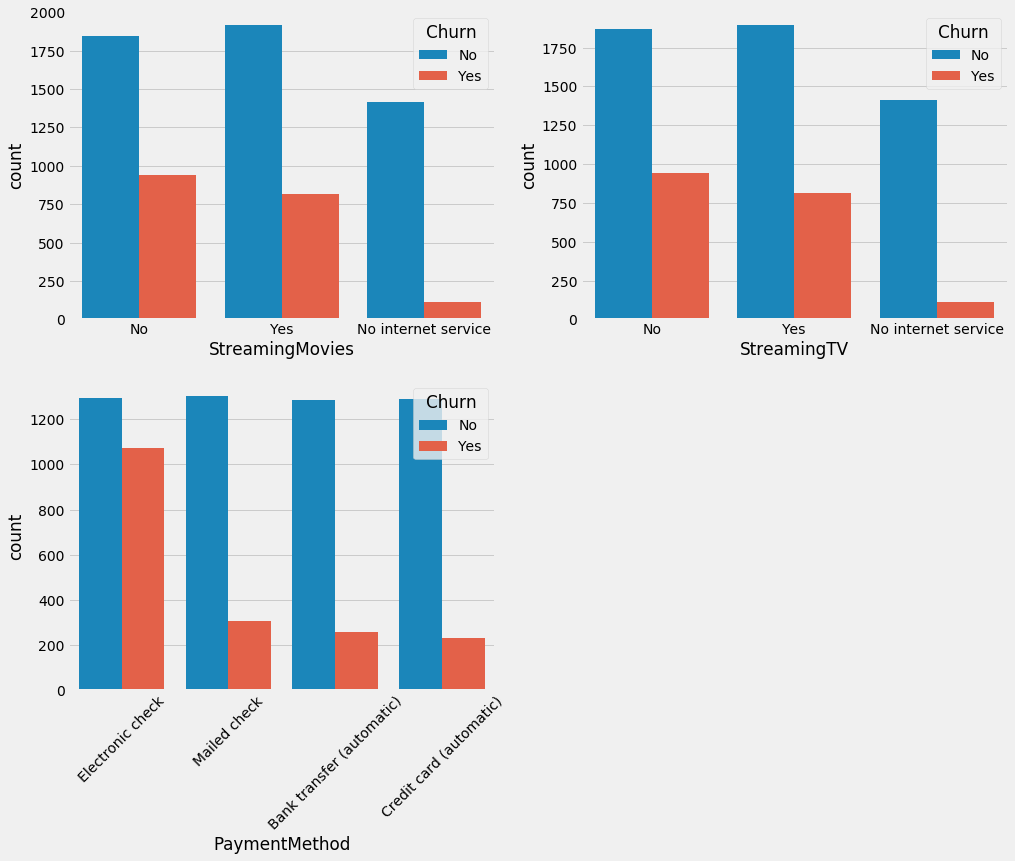

In [132]:
plt.figure(figsize=(15, 18))

plt.subplot(3, 2, 1)
sns.countplot('StreamingMovies', data=data, hue='Churn')

plt.subplot(3, 2, 2)
sns.countplot('StreamingTV', data=data, hue='Churn')

plt.subplot(3, 2, 3)
g = sns.countplot('PaymentMethod', data=data, hue='Churn')
g.set_xticklabels(g.get_xticklabels(), rotation=45);

# 2. Feature Engineering